# Course: Introduction To GenAI

*Notebook: Implementing_a_Simple_Diffusion_Model.ipynb*

<a href="https://colab.research.google.com/github/gassaf2/IntroductionToGenAI/blob/main/week4/Implementing_a_Simple_Diffusion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4 Hands_on Lab: Implementing a Simple Diffusion Model**

In this hands-on lab, we will write code to simulate the diffusion process.
By the end of this hands-on lab, you will:

* Understand the principles of forward and backward diffusion processes in image generation.
* Visualize the step-by-step progression of adding and removing noise in a diffusion model.
* Implement a basic diffusion process using Python and NumPy, building foundational knowledge for understanding real-world diffusion models.

# **Part 1: Simulate the Forward Diffusion Process**

1. **Import Needed Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


2.	**Generate a Simple Image**

Create a 2D array to represent a basic image (e.g., a black-and-white gradient).


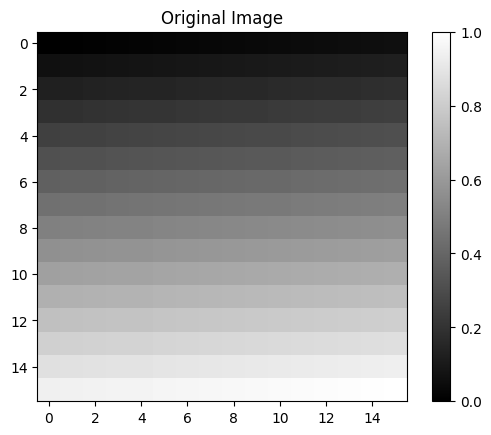

In [2]:
# Generate a simple "image" as a gradient
image = np.linspace(0, 1, 256).reshape(16, 16)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()


3.	**Define the Forward Diffusion Process**

Add Gaussian noise to simulate the degradation of the image over time:


In [3]:
def forward_diffusion(image, num_steps, beta_start=0.01, beta_end=0.5):
    betas = np.linspace(beta_start, beta_end, num_steps)
    noisy_images = []
    for t, beta in enumerate(betas):
        noise = np.random.normal(0, np.sqrt(beta), image.shape)
        noisy_image = np.sqrt(1 - beta) * image + noise
        noisy_images.append(noisy_image)
    return noisy_images



**4. Visualize the Forward Process:**

Simulate the diffusion process and visualize intermediate steps:

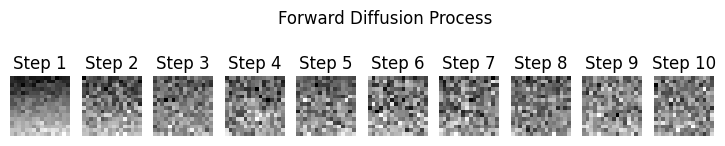

In [4]:
# Simulate forward diffusion
num_steps = 10
noisy_images = forward_diffusion(image, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
for i, step_image in enumerate(noisy_images[:]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Forward Diffusion Process")
plt.show()


# **Part 2: Simulate the Backward Denoising Process**

1.	**Define the Reverse Denoising Process**

Implement a denoising function to reconstruct the original image:


In [5]:
def backward_denoising(noisy_images, num_steps, beta_start=0.01, beta_end=0.5):
    betas = np.linspace(beta_start, beta_end, num_steps)
    denoised_images = [noisy_images[-1]]  # Start with the most noisy image
    for t in reversed(range(num_steps)):
        beta = betas[t]
        noisy_image = denoised_images[-1]
        noise_estimate = noisy_image - np.sqrt(1 - beta) * image
        denoised_image = (noisy_image - noise_estimate * beta) / np.sqrt(1 - beta)
        denoised_images.append(denoised_image)
    return denoised_images[::-1]



**2. Visualize the Reverse Process:**

Observe how noise is removed step-by-step:

11


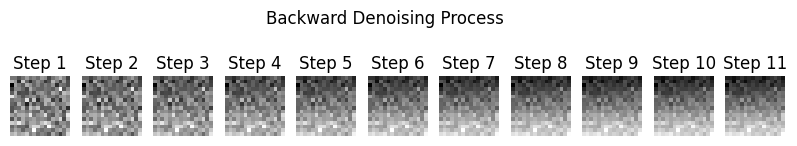

In [6]:
# Simulate backward denoising
denoised_images = backward_denoising(noisy_images, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
print(len(denoised_images))
for i, step_image in enumerate(denoised_images[::-1]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Backward Denoising Process")
plt.show()


# **Part 3: Experimentation**


1.	**Test with Different Noise Levels**

Change beta_start and beta_end to observe their impact on the diffusion process.
2.	**Use a Real Image**

Replace the gradient image with a real grayscale image:


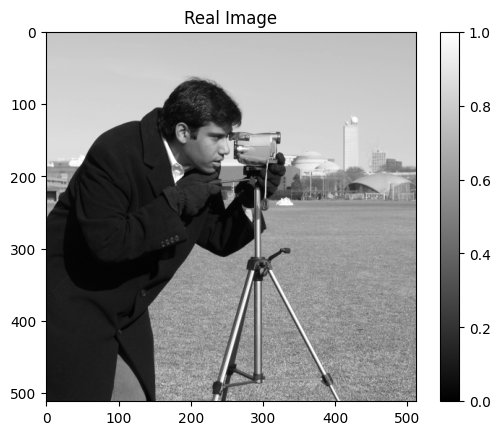

In [7]:
from skimage import data
image = data.camera() / 255.0  # Normalize image to [0, 1]
plt.imshow(image, cmap='gray')
plt.title("Real Image")
plt.colorbar()
plt.show()



**3. Evaluate Reconstruction Quality:**

Compare the denoised image to the original image:

In [8]:
# Calculate reconstruction error
reconstruction_error = np.mean((image - denoised_images[-1])**2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


ValueError: operands could not be broadcast together with shapes (512,512) (16,16) 

In [9]:
from skimage.transform import resize
denoised_resized = resize(denoised_images[-1], (512, 512), anti_aliasing=True)
reconstruction_error = np.mean((image - denoised_resized) ** 2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")

Reconstruction Error: 0.4173


Congratulations! You have reached the end of this Lab!

This hands-on lab builds a strong foundation for understanding diffusion models in advanced image generation tasks.